# Tdms File Visuals

This notebook generates visualization for TDMS files, that help to get the frame index for the 34 lines groups of the experiment, for both layers (162 and 182)

Also, this notebook generates a complete dataset from 
- .csv measurements
- calcuated featuers (area/gradient/autoencoder)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from nptdms import TdmsFile

In [4]:
tdms_file_161= '2020-02-18 16.57.37.228622-00161.avi.tdms'
tdms_file_161 = TdmsFile.read(tdms_file_161)

In [5]:
# tdms to dataframe
df_tdms = tdms_file_161['data'].as_dataframe(scaled_data=False)
df_tdms

,Layer,x,y,apd,LaserOn
0,161,-11060,-18163,4016,1
1,161,-11062,-18134,4442,1
2,161,-11065,-18104,4708,1
3,161,-11067,-18075,4108,1
4,161,-11070,-18046,4405,1
...,...,...,...,...,...
671339,162,16077,8995,-24,0
671340,162,16077,8995,-22,0
671341,162,16077,8995,-14,0
671342,162,16077,8995,-24,0


In [6]:
df_tdms_test = df_tdms

In [7]:
'''
We calculate LineIndex by the changes in Laser On/Off
'''
df_tdms_test['change_bool'] = 0
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].astype(np.int)
df_tdms_test['change_bool'] = df_tdms_test['LaserOn'].diff()
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].fillna(0)
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].replace(255.0,0.0)
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].astype(int)
df_tdms_test['LineIndex'] = df_tdms_test['change_bool'].cumsum()
df_tdms_test

,Layer,x,y,apd,LaserOn,change_bool,LineIndex
0,161,-11060,-18163,4016,1,0,0
1,161,-11062,-18134,4442,1,0,0
2,161,-11065,-18104,4708,1,0,0
3,161,-11067,-18075,4108,1,0,0
4,161,-11070,-18046,4405,1,0,0
...,...,...,...,...,...,...,...
671339,162,16077,8995,-24,0,0,5689
671340,162,16077,8995,-22,0,0,5689
671341,162,16077,8995,-14,0,0,5689
671342,162,16077,8995,-24,0,0,5689


In [9]:
mask1 = df_tdms_test['LineIndex']>=5418
mask2 = df_tdms_test['LineIndex']<=5688
mask = mask1&mask2
df_aux_part1 = df_tdms_test[mask]
df_aux_part1

,Layer,x,y,apd,LaserOn,change_bool,LineIndex
612251,162,-16767,219,4482,1,1,5418
612252,162,-16733,222,5311,1,0,5418
612253,162,-16700,225,5348,1,0,5418
612254,162,-16666,228,5673,1,0,5418
612255,162,-16633,231,5536,1,0,5418
...,...,...,...,...,...,...,...
665387,162,12648,8695,33,0,0,5688
665388,162,12681,8698,38,0,0,5688
665389,162,12714,8701,41,0,0,5688
665390,162,12748,8703,3,0,0,5688


In [10]:
# we manually calculate an offset to start at the desided start line index 
# that matches the GE experiment figure
df_aux_part1['LineID'] =(df_aux_part1['LineIndex']-5418)%34+1
df_aux_part1['BlockID'] =(df_aux_part1['LineIndex']-5418)//34+15
df_aux_part1

C:\Users\EnriqueMarin\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\EnriqueMarin\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
612251,162,-16767,219,4482,1,1,5418,1,15
612252,162,-16733,222,5311,1,0,5418,1,15
612253,162,-16700,225,5348,1,0,5418,1,15
612254,162,-16666,228,5673,1,0,5418,1,15
612255,162,-16633,231,5536,1,0,5418,1,15
...,...,...,...,...,...,...,...,...,...
665387,162,12648,8695,33,0,0,5688,33,22
665388,162,12681,8698,38,0,0,5688,33,22
665389,162,12714,8701,41,0,0,5688,33,22
665390,162,12748,8703,3,0,0,5688,33,22


In [11]:
mask = df_aux_part1['LaserOn']==1
# df_plot = df_aux_part1[plot_mask]
# mask1 = df_aux_part1['BlockID']==19
# mask2 = df_aux_part1['LaserOn']==1
# mask = mask1&mask2
mask = mask1
df_plot = df_aux_part1[mask]
df_plot
# df_plot = df_aux_part1

C:\Users\EnriqueMarin\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
612251,162,-16767,219,4482,1,1,5418,1,15
612252,162,-16733,222,5311,1,0,5418,1,15
612253,162,-16700,225,5348,1,0,5418,1,15
612254,162,-16666,228,5673,1,0,5418,1,15
612255,162,-16633,231,5536,1,0,5418,1,15
...,...,...,...,...,...,...,...,...,...
665387,162,12648,8695,33,0,0,5688,33,22
665388,162,12681,8698,38,0,0,5688,33,22
665389,162,12714,8701,41,0,0,5688,33,22
665390,162,12748,8703,3,0,0,5688,33,22


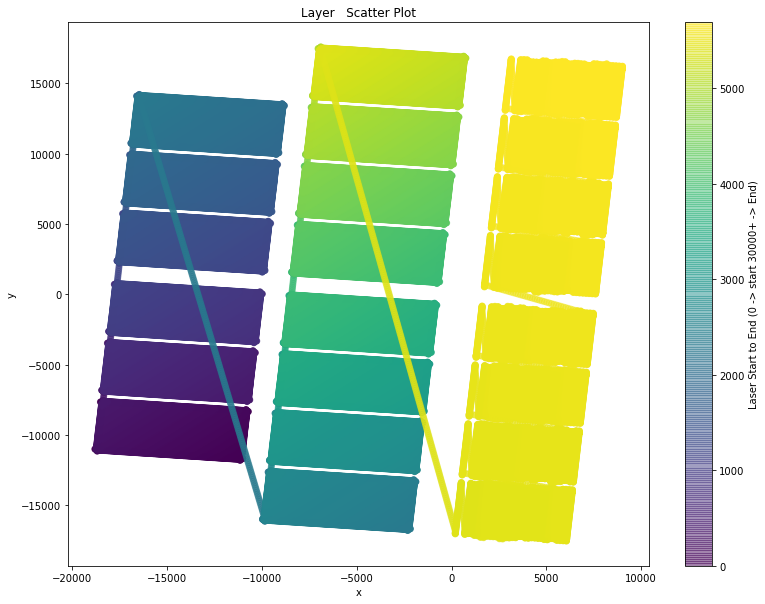

In [12]:
'''
Visualization for the complete layer 162, color by printing order
this is printed rotated (y,x), to match a reference image given by GE
'''

# complete layer 
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Layer   Scatter Plot')

#c sequence
c = df_tdms_test['LineIndex']

#plot
x=df_tdms_test['x']
y=df_tdms_test['y']
plt.scatter(y, x , c=c, alpha =0.5)
cbar = plt.colorbar()
cbar.set_label('Laser Start to End (0 -> start 30000+ -> End)')

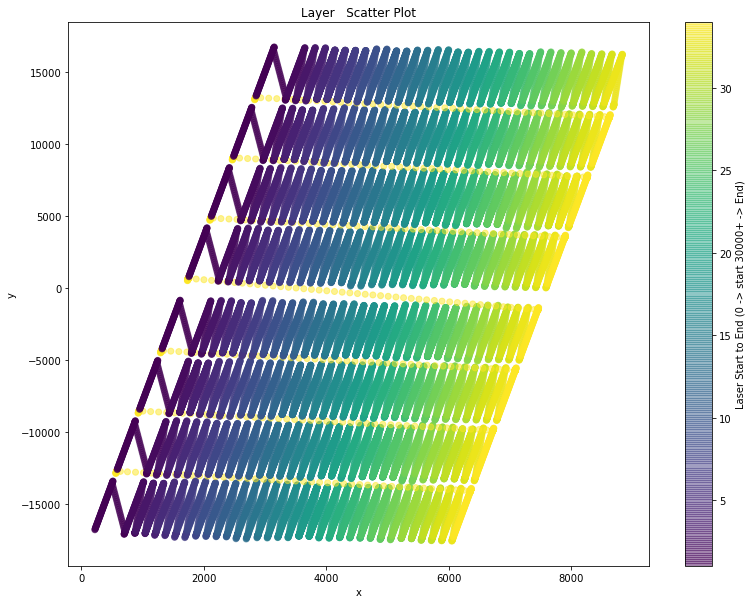

In [13]:
'''
layer 162 filtered for the 34 line group (the rightmost column on the last graph)
color by line index 1-34
this is printed rotated (y,x), to match a reference image given by GE
'''
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Layer   Scatter Plot')

#c sequence
c = df_plot['LineID']

#plot
x=df_plot['x']
y=df_plot['y']
plt.scatter(y, x , c=c, alpha =0.5)
cbar = plt.colorbar()
cbar.set_label('Laser Start to End (0 -> start 30000+ -> End)')

In [14]:
# we can export the relavant tdms data to a csv
df_aux_part1.to_csv('162_tdms_data_v3_24_Oct',index_label='Frame_Index')

# Layer 182 (same as 162)

In [15]:
tdms_file_181= '2020-02-18 17.20.17.799283-00181.avi.tdms'
tdms_file_181 = TdmsFile.read(tdms_file_181)

In [16]:
df_tdms = tdms_file_181['data'].as_dataframe(scaled_data=False)
df_tdms

,Layer,x,y,apd,LaserOn
0,181,-8123,-13174,3484,1
1,181,-8121,-13204,3439,1
2,181,-8118,-13233,3647,1
3,181,-8116,-13262,3750,1
4,181,-8113,-13292,3432,1
...,...,...,...,...,...
317914,182,16882,-210,-14,0
317915,182,16882,-210,-16,0
317916,182,16882,-210,-11,0
317917,182,16882,-210,-17,0


In [17]:
df_tdms_test = df_tdms

In [18]:
'''
We calculate LineIndex by the changes in Laser On/Off
'''
df_tdms_test['change_bool'] = 0
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].astype(np.int)
df_tdms_test['change_bool'] = df_tdms_test['LaserOn'].diff()
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].fillna(0)
# df_tdms_test['change_bool'] = df_tdms_test['change_bool'].astype(int)
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].replace(255.0,0.0)
# df_tdms_test['change_bool'] .value_counts()
df_tdms_test['change_bool'] = df_tdms_test['change_bool'].astype(int)
df_tdms_test['LineIndex'] = df_tdms_test['change_bool'].cumsum()
df_tdms_test

,Layer,x,y,apd,LaserOn,change_bool,LineIndex
0,181,-8123,-13174,3484,1,0,0
1,181,-8121,-13204,3439,1,0,0
2,181,-8118,-13233,3647,1,0,0
3,181,-8116,-13262,3750,1,0,0
4,181,-8113,-13292,3432,1,0,0
...,...,...,...,...,...,...,...
317914,182,16882,-210,-14,0,0,2591
317915,182,16882,-210,-16,0,0,2591
317916,182,16882,-210,-11,0,0,2591
317917,182,16882,-210,-17,0,0,2591


In [20]:
mask1 = df_tdms_test['LineIndex']>=2591-34*8 +1
mask2 = df_tdms_test['LineIndex']<=2591
mask = mask1&mask2
df_aux_part2 = df_tdms_test[mask]
df_aux_part2

,Layer,x,y,apd,LaserOn,change_bool,LineIndex
261976,182,-15972,-8986,5714,1,1,2320
261977,182,-15938,-8983,6797,1,0,2320
261978,182,-15905,-8981,7234,1,0,2320
261979,182,-15871,-8978,6306,1,0,2320
261980,182,-15838,-8975,7045,1,0,2320
...,...,...,...,...,...,...,...
317914,182,16882,-210,-14,0,0,2591
317915,182,16882,-210,-16,0,0,2591
317916,182,16882,-210,-11,0,0,2591
317917,182,16882,-210,-17,0,0,2591


In [21]:
'''
we manually calculate an offset to start at the desided start line index 
that matches the GE experiment figure
'''
df_aux_part2['LineID'] =(df_aux_part2['LineIndex']-2320)%34+1
df_aux_part2['BlockID'] =(df_aux_part2['LineIndex']-2320)//34+7
df_aux_part2[:1000]

C:\Users\EnriqueMarin\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\EnriqueMarin\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
261976,182,-15972,-8986,5714,1,1,2320,1,7
261977,182,-15938,-8983,6797,1,0,2320,1,7
261978,182,-15905,-8981,7234,1,0,2320,1,7
261979,182,-15871,-8978,6306,1,0,2320,1,7
261980,182,-15838,-8975,7045,1,0,2320,1,7
...,...,...,...,...,...,...,...,...,...
262971,182,-14760,-7532,5489,1,0,2326,7,7
262972,182,-14726,-7529,5924,1,0,2326,7,7
262973,182,-14692,-7526,5639,1,0,2326,7,7
262974,182,-14657,-7523,6636,1,0,2326,7,7


In [22]:
mask  = df_aux_part2['BlockID']>=11
df_plot = df_aux_part2[mask]
df_plot

,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
288229,182,1547,-7454,1109,1,1,2456,1,11
288230,182,1565,-7452,2457,1,0,2456,1,11
288231,182,1583,-7451,2817,1,0,2456,1,11
288232,182,1600,-7449,2913,1,0,2456,1,11
288233,182,1618,-7448,2559,1,0,2456,1,11
...,...,...,...,...,...,...,...,...,...
317914,182,16882,-210,-14,0,0,2591,34,14
317915,182,16882,-210,-16,0,0,2591,34,14
317916,182,16882,-210,-11,0,0,2591,34,14
317917,182,16882,-210,-17,0,0,2591,34,14


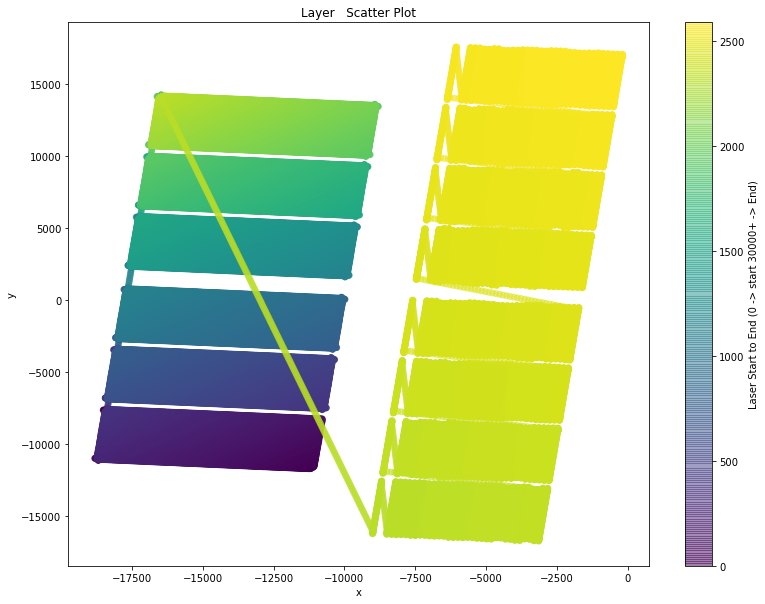

In [23]:
'''
Visualization for the complete layer 182, color by printing order
this is printed rotated (y,x), to match a reference image given by GE
'''
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Layer   Scatter Plot')

#c sequence
# c = df_plot['BlockID']
c = df_tdms_test['LineIndex']

#plot
x=df_tdms_test['x']
y=df_tdms_test['y']
plt.scatter(y, x , c=c, alpha =0.5)
cbar = plt.colorbar()
cbar.set_label('Laser Start to End (0 -> start 30000+ -> End)')

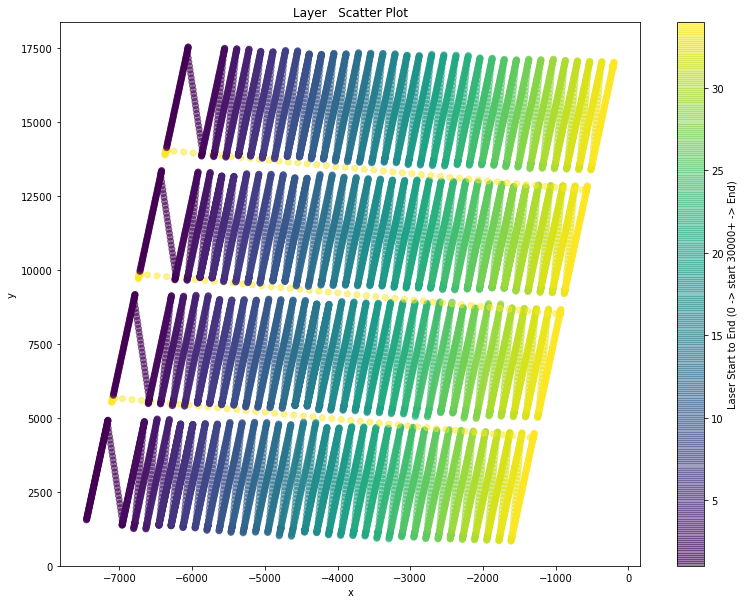

In [24]:
'''
layer 182 filtered for the 34 line group (the rightmost column on the last graph)
color by line index 1-34
this is printed rotated (y,x), to match a reference image given by GE
'''
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Layer   Scatter Plot')

#c sequence
# c = df_plot['BlockID']
c = df_plot['LineID']

#plot
x=df_plot['x']
y=df_plot['y']
plt.scatter(y, x , c=c, alpha =0.5)
cbar = plt.colorbar()
cbar.set_label('Laser Start to End (0 -> start 30000+ -> End)')

In [25]:
df_aux_part2.to_csv('182_tdms_data_v3_24_Oct.csv',index_label='Frame_Index')

# Complete 162

In [1]:
'''
We load all generated data and consolidate into one table
'''

'\nWe load all generated data and consolidate into one table\n'

In [26]:
# index to column
df_aux_part1.reset_index(inplace=True)
df_aux_part1 = df_aux_part1.rename(columns = {'index':'tdms_index'})
df_aux_part1

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
0,612251,162,-16767,219,4482,1,1,5418,1,15
1,612252,162,-16733,222,5311,1,0,5418,1,15
2,612253,162,-16700,225,5348,1,0,5418,1,15
3,612254,162,-16666,228,5673,1,0,5418,1,15
4,612255,162,-16633,231,5536,1,0,5418,1,15
...,...,...,...,...,...,...,...,...,...,...
53136,665387,162,12648,8695,33,0,0,5688,33,22
53137,665388,162,12681,8698,38,0,0,5688,33,22
53138,665389,162,12714,8701,41,0,0,5688,33,22
53139,665390,162,12748,8703,3,0,0,5688,33,22


In [27]:
'''
gradient features from
1_Feature_Engineering_Extract_Data_frames_V3_Gradients_all_frames.ipynb
'''
filename = '162_grad_v6.csv'
df_video_data_1_grad = pd.read_csv(filename, index_col=None, header=0)
df_video_data_1_grad

,Frame_Index,gradient_max_value_col,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows
0,612251,65.0,-10.0,16.0,25.0,3.0,39.0,-52.0,13.0,22.0,4.1
1,612252,74.0,-11.0,25.0,32.0,2.7,46.0,-68.0,12.0,23.0,5.0
2,612253,102.0,-25.0,9.0,28.0,4.5,115.0,-49.0,8.0,17.0,9.6
3,612254,68.0,-15.0,14.0,32.0,2.6,37.0,-60.0,14.0,23.0,4.2
4,612255,73.0,-16.0,14.0,32.0,2.8,77.0,-38.0,11.0,22.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...
53136,665387,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
53137,665388,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
53138,665389,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
53139,665390,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [28]:
'''
area features from
1_Feature_Engineering_Extract_Data_frames_V3_ellipse_ratios.ipynb
'''
filename = '162_v7.csv'
df_video_data_1 = pd.read_csv(filename, index_col=None, header=0)
df_video_data_1

,Frame_Index,Area_countour_5,Area_npixels_5,Mean_5,Sum_5,Radius_5,Rotated_Box_5,Rotated_Box_side1_5,Rotated_Box_side2_5,Rotated_Box_area_5,...,Rotated_Box_center_col_70,Ellipse_axis1_70,Ellipse_axis2_70,Ellipse_area_70,Ellipse_angle_70,Ellipse_center_row_70,Ellipse_center_col_70,Ratio_Area_npixels_rect_70,Ratio_Area_npixels_circle_70,Ratio_Area_npixels_ellipse_70
0,612251,253.0,280.0,32.3,9031,10.3,[[15 39]\n [15 19]\n [31 19]\n [31 39]],16.0,20.0,320.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00
1,612252,433.0,471.0,37.3,17572,16.4,[[21 51]\n [10 20]\n [27 15]\n [38 46]],17.7,32.9,582.3,...,28.5,7.2,10.2,57.7,155.7,28.9,23.0,0.98,1.28,0.90
2,612253,210.0,237.0,36.5,8640,11.4,[[15 42]\n [15 20]\n [28 20]\n [28 42]],13.0,22.0,286.0,...,27.0,5.4,6.8,28.8,160.9,27.1,21.5,0.86,1.04,0.82
3,612254,348.0,380.0,33.7,12813,13.4,[[27 46]\n [ 9 28]\n [22 15]\n [40 33]],18.4,25.5,469.2,...,27.5,5.6,6.5,28.6,157.5,27.7,22.8,0.69,1.11,0.99
4,612255,337.0,370.0,35.7,13224,13.6,[[14 43]\n [14 19]\n [32 19]\n [32 43]],18.0,24.0,432.0,...,28.5,5.8,7.6,34.6,161.5,28.5,22.5,0.88,1.13,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53136,665387,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00
53137,665388,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00
53138,665389,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00
53139,665390,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00


Finally,


df_aux_part1 correspondes to layer 162, which corresponds to tdms_file_path_2 ''2020-02-18 16.57.37.228622-00161.avi.tdms'

df_aux_part2 correspondes to layer 182, which corresponds to tdms_file_path_1 = '2020-02-18 17.20.17.799283-00181.avi.tdms'

In [29]:
df_video_data_1 =  df_video_data_1.merge(df_video_data_1_grad, on='Frame_Index', how='left')
df_video_data_1

,Frame_Index,Area_countour_5,Area_npixels_5,Mean_5,Sum_5,Radius_5,Rotated_Box_5,Rotated_Box_side1_5,Rotated_Box_side2_5,Rotated_Box_area_5,...,gradient_max_value_col,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows
0,612251,253.0,280.0,32.3,9031,10.3,[[15 39]\n [15 19]\n [31 19]\n [31 39]],16.0,20.0,320.0,...,65.0,-10.0,16.0,25.0,3.0,39.0,-52.0,13.0,22.0,4.1
1,612252,433.0,471.0,37.3,17572,16.4,[[21 51]\n [10 20]\n [27 15]\n [38 46]],17.7,32.9,582.3,...,74.0,-11.0,25.0,32.0,2.7,46.0,-68.0,12.0,23.0,5.0
2,612253,210.0,237.0,36.5,8640,11.4,[[15 42]\n [15 20]\n [28 20]\n [28 42]],13.0,22.0,286.0,...,102.0,-25.0,9.0,28.0,4.5,115.0,-49.0,8.0,17.0,9.6
3,612254,348.0,380.0,33.7,12813,13.4,[[27 46]\n [ 9 28]\n [22 15]\n [40 33]],18.4,25.5,469.2,...,68.0,-15.0,14.0,32.0,2.6,37.0,-60.0,14.0,23.0,4.2
4,612255,337.0,370.0,35.7,13224,13.6,[[14 43]\n [14 19]\n [32 19]\n [32 43]],18.0,24.0,432.0,...,73.0,-16.0,14.0,32.0,2.8,77.0,-38.0,11.0,22.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53136,665387,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
53137,665388,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
53138,665389,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
53139,665390,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [30]:
df_video_data_1['tdms_index'] = df_video_data_1['Frame_Index'].astype(int)
df_video_data_1[['tdms_index','Frame_Index']]

,tdms_index,Frame_Index
0,612251,612251
1,612252,612252
2,612253,612253
3,612254,612254
4,612255,612255
...,...,...
53136,665387,665387
53137,665388,665388
53138,665389,665389
53139,665390,665390


In [32]:
complete_video_tdms_1 =  df_aux_part1.merge(df_video_data_1, on='tdms_index', how='left')
complete_video_tdms_1[['tdms_index','Frame_Index']]

,tdms_index,Frame_Index
0,612251,612251
1,612252,612252
2,612253,612253
3,612254,612254
4,612255,612255
...,...,...
53136,665387,665387
53137,665388,665388
53138,665389,665389
53139,665390,665390


In [33]:
block_line_data = pd.read_csv('BoP02 Analysis KP_SCedit0306.csv')
block_line_data

,SN,DoE,Block,Stripe,LASER_POWER_POLY,LASER_SPEED_POLY,LASER_SPOT_POLY,Height,Depth,Width,TotalHeight
0,BOP02_12_1,BOP02,12,1,370,1000,0.180,86.944229,73.613533,144.577911,160.557762
1,BOP02_12_2,BOP02,12,2,370,1000,0.180,58.591248,73.769890,127.483208,132.361137
2,BOP02_12_3,BOP02,12,3,370,1000,0.180,91.636681,75.602501,150.029678,167.239182
3,BOP02_13_1,BOP02,13,1,370,1000,0.180,88.413681,83.070961,155.287918,171.484642
4,BOP02_13_2,BOP02,13,2,370,1000,0.180,134.644165,59.806252,140.760055,194.450417
...,...,...,...,...,...,...,...,...,...,...,...
267,BOP02_22_6,BOP02,22,6,190,241,0.125,74.841255,349.744171,240.536469,424.585426
268,BOP02_22_9,BOP02,22,9,362,1134,0.135,56.144547,144.577911,129.981232,200.722458
269,BOP02_22_10,BOP02,22,10,362,1134,0.135,60.375683,147.160645,137.337494,207.536327
270,BOP02_22_23,BOP02,22,23,362,376,0.125,66.899353,565.748047,187.858795,632.647400


In [34]:
# we set a matching column
complete_video_tdms_1['SN'] = 'BOP02_' + complete_video_tdms_1['BlockID'].astype(str) + '_' + complete_video_tdms_1['LineID'].astype(str)
complete_video_tdms_1[['tdms_index','Frame_Index']]

,tdms_index,Frame_Index
0,612251,612251
1,612252,612252
2,612253,612253
3,612254,612254
4,612255,612255
...,...,...
53136,665387,665387
53137,665388,665388
53138,665389,665389
53139,665390,665390


In [35]:
df_aux_part1_complete = complete_video_tdms_1.merge(block_line_data, on='SN', how='left')
df_aux_part1_complete

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,DoE,Block,Stripe,LASER_POWER_POLY,LASER_SPEED_POLY,LASER_SPOT_POLY,Height,Depth,Width,TotalHeight
0,612251,162,-16767,219,4482,1,1,5418,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,612252,162,-16733,222,5311,1,0,5418,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,612253,162,-16700,225,5348,1,0,5418,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,612254,162,-16666,228,5673,1,0,5418,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,612255,162,-16633,231,5536,1,0,5418,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53136,665387,162,12648,8695,33,0,0,5688,33,22,...,BOP02,22.0,33.0,370.0,1000.0,0.18,115.912254,66.275368,136.419174,182.187622
53137,665388,162,12681,8698,38,0,0,5688,33,22,...,BOP02,22.0,33.0,370.0,1000.0,0.18,115.912254,66.275368,136.419174,182.187622
53138,665389,162,12714,8701,41,0,0,5688,33,22,...,BOP02,22.0,33.0,370.0,1000.0,0.18,115.912254,66.275368,136.419174,182.187622
53139,665390,162,12748,8703,3,0,0,5688,33,22,...,BOP02,22.0,33.0,370.0,1000.0,0.18,115.912254,66.275368,136.419174,182.187622


In [36]:
'''
we drop LASER_SPOT_POLY to keep only frames that have .csv measurements
'''
df_aux_part1_complete = df_aux_part1_complete.dropna(subset=['LASER_SPOT_POLY'])
df_aux_part1_complete.columns.tolist()

['tdms_index',
 'Layer',
 'x',
 'y',
 'apd',
 'LaserOn',
 'change_bool',
 'LineIndex',
 'LineID',
 'BlockID',
 'Frame_Index',
 'Area_countour_5',
 'Area_npixels_5',
 'Mean_5',
 'Sum_5',
 'Radius_5',
 'Rotated_Box_5',
 'Rotated_Box_side1_5',
 'Rotated_Box_side2_5',
 'Rotated_Box_area_5',
 'Rotated_Box_angle_5',
 'Rotated_Box_center_row_5',
 'Rotated_Box_center_col_5',
 'Ellipse_axis1_5',
 'Ellipse_axis2_5',
 'Ellipse_area_5',
 'Ellipse_angle_5',
 'Ellipse_center_row_5',
 'Ellipse_center_col_5',
 'Ratio_Area_npixels_rect_5',
 'Ratio_Area_npixels_circle_5',
 'Ratio_Area_npixels_ellipse_5',
 'Area_countour_10',
 'Area_npixels_10',
 'Mean_10',
 'Sum_10',
 'Radius_10',
 'Rotated_Box_10',
 'Rotated_Box_side1_10',
 'Rotated_Box_side2_10',
 'Rotated_Box_area_10',
 'Rotated_Box_angle_10',
 'Rotated_Box_center_row_10',
 'Rotated_Box_center_col_10',
 'Ellipse_axis1_10',
 'Ellipse_axis2_10',
 'Ellipse_area_10',
 'Ellipse_angle_10',
 'Ellipse_center_row_10',
 'Ellipse_center_col_10',
 'Ratio_Area_np

In [38]:
'''
autoencoder features
'''
filename = 'new_features_autoencoder_182_and_162-1_v10.csv'
df_video_data_1_encoder = pd.read_csv(filename, index_col=None, header=0)
df_video_data_1_encoder = df_video_data_1_encoder.rename(columns={"Unnamed: 0": "Frame_Index"})
df_video_data_1_encoder['Frame_Index'] = df_video_data_1_encoder['Frame_Index'].str[14:20]
df_video_data_1_encoder['Frame_Index'] = df_video_data_1_encoder['Frame_Index'].astype(np.int64)
encoder_col = [str(i) for i in range(10)]
encoder_col_names = ['encoder_' + str(i) for i in range(10)]
map_dict = dict(zip(encoder_col,encoder_col_names))
df_video_data_1_encoder = df_video_data_1_encoder.rename(columns=map_dict)

In [39]:
df_video_data_1_encoder

,Frame_Index,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,662134,0.211787,0.206882,0.273032,0.181818,0.122480,0.190283,0.366539,0.318460,0.229298,0.248550
1,655798,0.412493,0.368864,0.446753,0.423092,0.287558,0.397223,0.228660,0.475882,0.372914,0.461889
2,644695,0.424933,0.287912,0.503921,0.485684,0.437505,0.481044,0.244194,0.430291,0.330769,0.394741
3,655940,0.448245,0.292908,0.404708,0.312422,0.219118,0.376526,0.271577,0.506622,0.226767,0.233247
4,664545,0.308779,0.254866,0.316278,0.352836,0.288250,0.277823,0.280274,0.354093,0.203311,0.274738
...,...,...,...,...,...,...,...,...,...,...,...
33022,295904,0.416500,0.408000,0.511491,0.526296,0.586490,0.572192,0.235315,0.417218,0.495945,0.580203
33023,655959,0.433075,0.395858,0.471151,0.399257,0.162466,0.245434,0.286731,0.423119,0.295808,0.355828
33024,663233,0.289930,0.341028,0.343245,0.402940,0.259670,0.291934,0.295646,0.353176,0.275593,0.315085
33025,644854,0.400940,0.296056,0.494841,0.497371,0.449516,0.429972,0.224353,0.398904,0.352246,0.461103


In [40]:
# df_video_data_1_encoder.to_csv('162_autoencoder_features_v9.csv',index_label='Frame_Index')
df_video_data_1_encoder

,Frame_Index,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,662134,0.211787,0.206882,0.273032,0.181818,0.122480,0.190283,0.366539,0.318460,0.229298,0.248550
1,655798,0.412493,0.368864,0.446753,0.423092,0.287558,0.397223,0.228660,0.475882,0.372914,0.461889
2,644695,0.424933,0.287912,0.503921,0.485684,0.437505,0.481044,0.244194,0.430291,0.330769,0.394741
3,655940,0.448245,0.292908,0.404708,0.312422,0.219118,0.376526,0.271577,0.506622,0.226767,0.233247
4,664545,0.308779,0.254866,0.316278,0.352836,0.288250,0.277823,0.280274,0.354093,0.203311,0.274738
...,...,...,...,...,...,...,...,...,...,...,...
33022,295904,0.416500,0.408000,0.511491,0.526296,0.586490,0.572192,0.235315,0.417218,0.495945,0.580203
33023,655959,0.433075,0.395858,0.471151,0.399257,0.162466,0.245434,0.286731,0.423119,0.295808,0.355828
33024,663233,0.289930,0.341028,0.343245,0.402940,0.259670,0.291934,0.295646,0.353176,0.275593,0.315085
33025,644854,0.400940,0.296056,0.494841,0.497371,0.449516,0.429972,0.224353,0.398904,0.352246,0.461103


In [41]:
df_video_data_1_encoder['Frame_Index']

0        662134
1        655798
2        644695
3        655940
4        664545
          ...  
33022    295904
33023    655959
33024    663233
33025    644854
33026    655781
Name: Frame_Index, Length: 33027, dtype: int64

In [42]:
'''
this is the complete table
'''
df_aux_part1_complete_autoencoder = df_aux_part1_complete.merge(df_video_data_1_encoder, on='Frame_Index', how='left')
df_aux_part1_complete_autoencoder.columns.tolist()

['tdms_index',
 'Layer',
 'x',
 'y',
 'apd',
 'LaserOn',
 'change_bool',
 'LineIndex',
 'LineID',
 'BlockID',
 'Frame_Index',
 'Area_countour_5',
 'Area_npixels_5',
 'Mean_5',
 'Sum_5',
 'Radius_5',
 'Rotated_Box_5',
 'Rotated_Box_side1_5',
 'Rotated_Box_side2_5',
 'Rotated_Box_area_5',
 'Rotated_Box_angle_5',
 'Rotated_Box_center_row_5',
 'Rotated_Box_center_col_5',
 'Ellipse_axis1_5',
 'Ellipse_axis2_5',
 'Ellipse_area_5',
 'Ellipse_angle_5',
 'Ellipse_center_row_5',
 'Ellipse_center_col_5',
 'Ratio_Area_npixels_rect_5',
 'Ratio_Area_npixels_circle_5',
 'Ratio_Area_npixels_ellipse_5',
 'Area_countour_10',
 'Area_npixels_10',
 'Mean_10',
 'Sum_10',
 'Radius_10',
 'Rotated_Box_10',
 'Rotated_Box_side1_10',
 'Rotated_Box_side2_10',
 'Rotated_Box_area_10',
 'Rotated_Box_angle_10',
 'Rotated_Box_center_row_10',
 'Rotated_Box_center_col_10',
 'Ellipse_axis1_10',
 'Ellipse_axis2_10',
 'Ellipse_area_10',
 'Ellipse_angle_10',
 'Ellipse_center_row_10',
 'Ellipse_center_col_10',
 'Ratio_Area_np

# Complete 182 (same as 162)

In [44]:
df_aux_part2.reset_index(inplace=True)
df_aux_part2 = df_aux_part2.rename(columns = {'index':'tdms_index'})
df_aux_part2

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
0,261976,182,-15972,-8986,5714,1,1,2320,1,7
1,261977,182,-15938,-8983,6797,1,0,2320,1,7
2,261978,182,-15905,-8981,7234,1,0,2320,1,7
3,261979,182,-15871,-8978,6306,1,0,2320,1,7
4,261980,182,-15838,-8975,7045,1,0,2320,1,7
...,...,...,...,...,...,...,...,...,...,...
55938,317914,182,16882,-210,-14,0,0,2591,34,14
55939,317915,182,16882,-210,-16,0,0,2591,34,14
55940,317916,182,16882,-210,-11,0,0,2591,34,14
55941,317917,182,16882,-210,-17,0,0,2591,34,14


In [45]:
filename = '182_grad_v3.csv'
df_video_data_2_grad = pd.read_csv(filename, index_col=None, header=0)
df_video_data_2_grad

,Frame_Index,gradient_max_value_col,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows
0,288228,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,288229,13.0,-12.0,4.0,10.0,2.5,9.0,-10.0,5.0,10.0,1.9
2,288230,28.0,-27.0,7.0,15.0,3.7,26.0,-22.0,8.0,17.0,2.8
3,288231,24.0,-26.0,8.0,17.0,2.9,25.0,-18.0,8.0,23.0,1.9
4,288232,25.0,-23.0,9.0,19.0,2.5,22.0,-18.0,6.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
29686,317914,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29687,317915,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29688,317916,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
29689,317917,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [46]:
filename = '182_v11.csv'
df_video_data_2 = pd.read_csv(filename, index_col=None, header=0)
df_video_data_2['tdms_index'] = df_video_data_2['Frame_Index']
df_video_data_2

C:\Users\EnriqueMarin\Anaconda3\envs\data-x\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6,27,48,69,90,111,132,153,174,195,216,237,258,279) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Frame_Index,Area_countour_5,Area_npixels_5,Mean_5,Sum_5,Radius_5,Rotated_Box_5,Rotated_Box_side1_5,Rotated_Box_side2_5,Rotated_Box_area_5,...,Ellipse_axis1_70,Ellipse_axis2_70,Ellipse_area_70,Ellipse_angle_70,Ellipse_center_row_70,Ellipse_center_col_70,Ratio_Area_npixels_rect_70,Ratio_Area_npixels_circle_70,Ratio_Area_npixels_ellipse_70,tdms_index
0,288227,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,288227
1,288228,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,288228
2,288229,41.0,53.0,20.2,1070,4.1,[[17 30]\n [17 23]\n [24 23]\n [24 30]],7.0,7.0,49.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,288229
3,288230,136.0,156.0,40.5,6322,7.2,[[15 33]\n [15 20]\n [28 20]\n [28 33]],13.0,13.0,169.0,...,5.4,5.9,25.0,135.0,26.4,20.6,0.83,0.88,0.83,288230
4,288231,173.0,195.0,39.1,7627,8.3,[[23 38]\n [11 26]\n [21 17]\n [32 28]],13.5,17.0,229.5,...,6.2,6.6,32.1,121.2,26.4,21.1,0.81,0.98,0.87,288231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,317914,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,317914
29688,317915,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,317915
29689,317916,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,317916
29690,317917,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,317917


In [47]:
df_video_data_2 =  df_video_data_2.merge(df_video_data_2_grad, on='Frame_Index', how='left')
for a in df_video_data_2.columns.tolist():
    print(a)

Frame_Index
Area_countour_5
Area_npixels_5
Mean_5
Sum_5
Radius_5
Rotated_Box_5
Rotated_Box_side1_5
Rotated_Box_side2_5
Rotated_Box_area_5
Rotated_Box_angle_5
Rotated_Box_center_row_5
Rotated_Box_center_col_5
Ellipse_axis1_5
Ellipse_axis2_5
Ellipse_area_5
Ellipse_angle_5
Ellipse_center_row_5
Ellipse_center_col_5
Ratio_Area_npixels_rect_5
Ratio_Area_npixels_circle_5
Ratio_Area_npixels_ellipse_5
Area_countour_10
Area_npixels_10
Mean_10
Sum_10
Radius_10
Rotated_Box_10
Rotated_Box_side1_10
Rotated_Box_side2_10
Rotated_Box_area_10
Rotated_Box_angle_10
Rotated_Box_center_row_10
Rotated_Box_center_col_10
Ellipse_axis1_10
Ellipse_axis2_10
Ellipse_area_10
Ellipse_angle_10
Ellipse_center_row_10
Ellipse_center_col_10
Ratio_Area_npixels_rect_10
Ratio_Area_npixels_circle_10
Ratio_Area_npixels_ellipse_10
Area_countour_15
Area_npixels_15
Mean_15
Sum_15
Radius_15
Rotated_Box_15
Rotated_Box_side1_15
Rotated_Box_side2_15
Rotated_Box_area_15
Rotated_Box_angle_15
Rotated_Box_center_row_15
Rotated_Box_cente

In [48]:
df_aux_part2

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID
0,261976,182,-15972,-8986,5714,1,1,2320,1,7
1,261977,182,-15938,-8983,6797,1,0,2320,1,7
2,261978,182,-15905,-8981,7234,1,0,2320,1,7
3,261979,182,-15871,-8978,6306,1,0,2320,1,7
4,261980,182,-15838,-8975,7045,1,0,2320,1,7
...,...,...,...,...,...,...,...,...,...,...
55938,317914,182,16882,-210,-14,0,0,2591,34,14
55939,317915,182,16882,-210,-16,0,0,2591,34,14
55940,317916,182,16882,-210,-11,0,0,2591,34,14
55941,317917,182,16882,-210,-17,0,0,2591,34,14


In [49]:
complete_video_tdms_2 =  df_aux_part2.merge(df_video_data_2, on='tdms_index', how='left')
complete_video_tdms_2

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,gradient_max_value_col,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows
0,261976,182,-15972,-8986,5714,1,1,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,261977,182,-15938,-8983,6797,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,261978,182,-15905,-8981,7234,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,261979,182,-15871,-8978,6306,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261980,182,-15838,-8975,7045,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55938,317914,182,16882,-210,-14,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
55939,317915,182,16882,-210,-16,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
55940,317916,182,16882,-210,-11,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
55941,317917,182,16882,-210,-17,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [50]:
block_line_data = pd.read_csv('BoP02 Analysis KP_SCedit0306.csv')
block_line_data

,SN,DoE,Block,Stripe,LASER_POWER_POLY,LASER_SPEED_POLY,LASER_SPOT_POLY,Height,Depth,Width,TotalHeight
0,BOP02_12_1,BOP02,12,1,370,1000,0.180,86.944229,73.613533,144.577911,160.557762
1,BOP02_12_2,BOP02,12,2,370,1000,0.180,58.591248,73.769890,127.483208,132.361137
2,BOP02_12_3,BOP02,12,3,370,1000,0.180,91.636681,75.602501,150.029678,167.239182
3,BOP02_13_1,BOP02,13,1,370,1000,0.180,88.413681,83.070961,155.287918,171.484642
4,BOP02_13_2,BOP02,13,2,370,1000,0.180,134.644165,59.806252,140.760055,194.450417
...,...,...,...,...,...,...,...,...,...,...,...
267,BOP02_22_6,BOP02,22,6,190,241,0.125,74.841255,349.744171,240.536469,424.585426
268,BOP02_22_9,BOP02,22,9,362,1134,0.135,56.144547,144.577911,129.981232,200.722458
269,BOP02_22_10,BOP02,22,10,362,1134,0.135,60.375683,147.160645,137.337494,207.536327
270,BOP02_22_23,BOP02,22,23,362,376,0.125,66.899353,565.748047,187.858795,632.647400


In [51]:
complete_video_tdms_2['SN'] = 'BOP02_' + complete_video_tdms_2['BlockID'].astype(str) + '_' + complete_video_tdms_2['LineID'].astype(str)
complete_video_tdms_2

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows,SN
0,261976,182,-15972,-8986,5714,1,1,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOP02_7_1
1,261977,182,-15938,-8983,6797,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOP02_7_1
2,261978,182,-15905,-8981,7234,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOP02_7_1
3,261979,182,-15871,-8978,6306,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOP02_7_1
4,261980,182,-15838,-8975,7045,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOP02_7_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55938,317914,182,16882,-210,-14,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,BOP02_14_34
55939,317915,182,16882,-210,-16,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,BOP02_14_34
55940,317916,182,16882,-210,-11,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,BOP02_14_34
55941,317917,182,16882,-210,-17,0,0,2591,34,14,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,BOP02_14_34


In [52]:
df_aux_part2_complete = complete_video_tdms_2.merge(block_line_data, on='SN', how='left')
df_aux_part2_complete

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,DoE,Block,Stripe,LASER_POWER_POLY,LASER_SPEED_POLY,LASER_SPOT_POLY,Height,Depth,Width,TotalHeight
0,261976,182,-15972,-8986,5714,1,1,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,261977,182,-15938,-8983,6797,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,261978,182,-15905,-8981,7234,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,261979,182,-15871,-8978,6306,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261980,182,-15838,-8975,7045,1,0,2320,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55938,317914,182,16882,-210,-14,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773
55939,317915,182,16882,-210,-16,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773
55940,317916,182,16882,-210,-11,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773
55941,317917,182,16882,-210,-17,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773


In [53]:
df_aux_part2_complete = df_aux_part2_complete.dropna(subset=['LASER_SPOT_POLY'])
df_aux_part2_complete

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,DoE,Block,Stripe,LASER_POWER_POLY,LASER_SPEED_POLY,LASER_SPOT_POLY,Height,Depth,Width,TotalHeight
26253,288229,182,1547,-7454,1109,1,1,2456,1,11,...,BOP02,11.0,1.0,360.0,528.0,0.08,100.574074,474.140289,139.474228,574.714363
26254,288230,182,1565,-7452,2457,1,0,2456,1,11,...,BOP02,11.0,1.0,360.0,528.0,0.08,100.574074,474.140289,139.474228,574.714363
26255,288231,182,1583,-7451,2817,1,0,2456,1,11,...,BOP02,11.0,1.0,360.0,528.0,0.08,100.574074,474.140289,139.474228,574.714363
26256,288232,182,1600,-7449,2913,1,0,2456,1,11,...,BOP02,11.0,1.0,360.0,528.0,0.08,100.574074,474.140289,139.474228,574.714363
26257,288233,182,1618,-7448,2559,1,0,2456,1,11,...,BOP02,11.0,1.0,360.0,528.0,0.08,100.574074,474.140289,139.474228,574.714363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55938,317914,182,16882,-210,-14,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773
55939,317915,182,16882,-210,-16,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773
55940,317916,182,16882,-210,-11,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773
55941,317917,182,16882,-210,-17,0,0,2591,34,14,...,BOP02,14.0,34.0,370.0,1000.0,0.18,76.113411,86.980362,143.970459,163.093773


In [54]:
# df_video_data_2_encoder.to_csv('182_autoencoder_features_v8.csv',index_label='Frame_Index')
# df_video_data_2_encoder

In [55]:
filename = 'new_features_autoencoder_182_and_162-1_v10.csv'
df_video_data_2_encoder = pd.read_csv(filename, index_col=None, header=0)
df_video_data_2_encoder = df_video_data_2_encoder.rename(columns={"Unnamed: 0": "Frame_Index"})
df_video_data_2_encoder['Frame_Index']

0        video161_frame662134.png
1        video161_frame655798.png
2        video161_frame644695.png
3        video161_frame655940.png
4        video161_frame664545.png
                   ...           
33022    video181_frame295904.png
33023    video161_frame655959.png
33024    video161_frame663233.png
33025    video161_frame644854.png
33026    video161_frame655781.png
Name: Frame_Index, Length: 33027, dtype: object

In [56]:
df_video_data_2_encoder['Frame_Index'] = df_video_data_2_encoder['Frame_Index'].str[14:20]
df_video_data_2_encoder['Frame_Index'] = df_video_data_2_encoder['Frame_Index'].astype(np.int64)
encoder_col = [str(i) for i in range(10)]
encoder_col_names = ['encoder_' + str(i) for i in range(10)]
map_dict = dict(zip(encoder_col,encoder_col_names))
df_video_data_2_encoder = df_video_data_2_encoder.rename(columns=map_dict)
df_video_data_2_encoder

,Frame_Index,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,662134,0.211787,0.206882,0.273032,0.181818,0.122480,0.190283,0.366539,0.318460,0.229298,0.248550
1,655798,0.412493,0.368864,0.446753,0.423092,0.287558,0.397223,0.228660,0.475882,0.372914,0.461889
2,644695,0.424933,0.287912,0.503921,0.485684,0.437505,0.481044,0.244194,0.430291,0.330769,0.394741
3,655940,0.448245,0.292908,0.404708,0.312422,0.219118,0.376526,0.271577,0.506622,0.226767,0.233247
4,664545,0.308779,0.254866,0.316278,0.352836,0.288250,0.277823,0.280274,0.354093,0.203311,0.274738
...,...,...,...,...,...,...,...,...,...,...,...
33022,295904,0.416500,0.408000,0.511491,0.526296,0.586490,0.572192,0.235315,0.417218,0.495945,0.580203
33023,655959,0.433075,0.395858,0.471151,0.399257,0.162466,0.245434,0.286731,0.423119,0.295808,0.355828
33024,663233,0.289930,0.341028,0.343245,0.402940,0.259670,0.291934,0.295646,0.353176,0.275593,0.315085
33025,644854,0.400940,0.296056,0.494841,0.497371,0.449516,0.429972,0.224353,0.398904,0.352246,0.461103


In [57]:
df_video_data_2_encoder['tdms_index'] = df_video_data_2_encoder['Frame_Index']
df_video_data_2_encoder = df_video_data_2_encoder.drop('Frame_Index',  axis='columns')

In [58]:
df_video_data_2_encoder

,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9,tdms_index
0,0.211787,0.206882,0.273032,0.181818,0.122480,0.190283,0.366539,0.318460,0.229298,0.248550,662134
1,0.412493,0.368864,0.446753,0.423092,0.287558,0.397223,0.228660,0.475882,0.372914,0.461889,655798
2,0.424933,0.287912,0.503921,0.485684,0.437505,0.481044,0.244194,0.430291,0.330769,0.394741,644695
3,0.448245,0.292908,0.404708,0.312422,0.219118,0.376526,0.271577,0.506622,0.226767,0.233247,655940
4,0.308779,0.254866,0.316278,0.352836,0.288250,0.277823,0.280274,0.354093,0.203311,0.274738,664545
...,...,...,...,...,...,...,...,...,...,...,...
33022,0.416500,0.408000,0.511491,0.526296,0.586490,0.572192,0.235315,0.417218,0.495945,0.580203,295904
33023,0.433075,0.395858,0.471151,0.399257,0.162466,0.245434,0.286731,0.423119,0.295808,0.355828,655959
33024,0.289930,0.341028,0.343245,0.402940,0.259670,0.291934,0.295646,0.353176,0.275593,0.315085,663233
33025,0.400940,0.296056,0.494841,0.497371,0.449516,0.429972,0.224353,0.398904,0.352246,0.461103,644854


In [59]:
df_aux_part2_complete_autoencoder = df_aux_part2_complete.merge(df_video_data_2_encoder, on='tdms_index', how='left')
df_aux_part2_complete_autoencoder.columns.tolist()

['tdms_index',
 'Layer',
 'x',
 'y',
 'apd',
 'LaserOn',
 'change_bool',
 'LineIndex',
 'LineID',
 'BlockID',
 'Frame_Index',
 'Area_countour_5',
 'Area_npixels_5',
 'Mean_5',
 'Sum_5',
 'Radius_5',
 'Rotated_Box_5',
 'Rotated_Box_side1_5',
 'Rotated_Box_side2_5',
 'Rotated_Box_area_5',
 'Rotated_Box_angle_5',
 'Rotated_Box_center_row_5',
 'Rotated_Box_center_col_5',
 'Ellipse_axis1_5',
 'Ellipse_axis2_5',
 'Ellipse_area_5',
 'Ellipse_angle_5',
 'Ellipse_center_row_5',
 'Ellipse_center_col_5',
 'Ratio_Area_npixels_rect_5',
 'Ratio_Area_npixels_circle_5',
 'Ratio_Area_npixels_ellipse_5',
 'Area_countour_10',
 'Area_npixels_10',
 'Mean_10',
 'Sum_10',
 'Radius_10',
 'Rotated_Box_10',
 'Rotated_Box_side1_10',
 'Rotated_Box_side2_10',
 'Rotated_Box_area_10',
 'Rotated_Box_angle_10',
 'Rotated_Box_center_row_10',
 'Rotated_Box_center_col_10',
 'Ellipse_axis1_10',
 'Ellipse_axis2_10',
 'Ellipse_area_10',
 'Ellipse_angle_10',
 'Ellipse_center_row_10',
 'Ellipse_center_col_10',
 'Ratio_Area_np

In [60]:
df_video_data_2_encoder.to_csv('182_autoencoder_features_v10.csv',index_label='Frame_Index')

In [61]:
df_video_data_2_encoder

,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9,tdms_index
0,0.211787,0.206882,0.273032,0.181818,0.122480,0.190283,0.366539,0.318460,0.229298,0.248550,662134
1,0.412493,0.368864,0.446753,0.423092,0.287558,0.397223,0.228660,0.475882,0.372914,0.461889,655798
2,0.424933,0.287912,0.503921,0.485684,0.437505,0.481044,0.244194,0.430291,0.330769,0.394741,644695
3,0.448245,0.292908,0.404708,0.312422,0.219118,0.376526,0.271577,0.506622,0.226767,0.233247,655940
4,0.308779,0.254866,0.316278,0.352836,0.288250,0.277823,0.280274,0.354093,0.203311,0.274738,664545
...,...,...,...,...,...,...,...,...,...,...,...
33022,0.416500,0.408000,0.511491,0.526296,0.586490,0.572192,0.235315,0.417218,0.495945,0.580203,295904
33023,0.433075,0.395858,0.471151,0.399257,0.162466,0.245434,0.286731,0.423119,0.295808,0.355828,655959
33024,0.289930,0.341028,0.343245,0.402940,0.259670,0.291934,0.295646,0.353176,0.275593,0.315085,663233
33025,0.400940,0.296056,0.494841,0.497371,0.449516,0.429972,0.224353,0.398904,0.352246,0.461103,644854


In [62]:
df_aux_part2_complete_autoencoder.to_csv('182_complete_v10_all_previos_plus_autoencoder_only182.csv',index_label='Frame_Index')

In [63]:
df_aux_part2_complete_autoencoder.columns.tolist()

['tdms_index',
 'Layer',
 'x',
 'y',
 'apd',
 'LaserOn',
 'change_bool',
 'LineIndex',
 'LineID',
 'BlockID',
 'Frame_Index',
 'Area_countour_5',
 'Area_npixels_5',
 'Mean_5',
 'Sum_5',
 'Radius_5',
 'Rotated_Box_5',
 'Rotated_Box_side1_5',
 'Rotated_Box_side2_5',
 'Rotated_Box_area_5',
 'Rotated_Box_angle_5',
 'Rotated_Box_center_row_5',
 'Rotated_Box_center_col_5',
 'Ellipse_axis1_5',
 'Ellipse_axis2_5',
 'Ellipse_area_5',
 'Ellipse_angle_5',
 'Ellipse_center_row_5',
 'Ellipse_center_col_5',
 'Ratio_Area_npixels_rect_5',
 'Ratio_Area_npixels_circle_5',
 'Ratio_Area_npixels_ellipse_5',
 'Area_countour_10',
 'Area_npixels_10',
 'Mean_10',
 'Sum_10',
 'Radius_10',
 'Rotated_Box_10',
 'Rotated_Box_side1_10',
 'Rotated_Box_side2_10',
 'Rotated_Box_area_10',
 'Rotated_Box_angle_10',
 'Rotated_Box_center_row_10',
 'Rotated_Box_center_col_10',
 'Ellipse_axis1_10',
 'Ellipse_axis2_10',
 'Ellipse_area_10',
 'Ellipse_angle_10',
 'Ellipse_center_row_10',
 'Ellipse_center_col_10',
 'Ratio_Area_np

In [64]:
df_aux_part1_complete_autoencoder

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,639002,162,798,1756,1688,1,1,5554,1,19,...,0.126472,0.124965,0.202442,0.122546,0.267214,0.187425,0.483032,0.135109,0.171343,0.168408
1,639003,162,833,1759,2399,1,0,5554,1,19,...,0.414566,0.252620,0.386618,0.365045,0.128948,0.145017,0.284230,0.477547,0.239621,0.214533
2,639004,162,867,1762,3058,1,0,5554,1,19,...,0.403801,0.295532,0.375750,0.415691,0.109082,0.198924,0.275004,0.539477,0.338243,0.300042
3,639005,162,901,1765,2942,1,0,5554,1,19,...,0.478218,0.257299,0.455102,0.329200,0.102793,0.288820,0.279632,0.566580,0.224948,0.269998
4,639006,162,936,1768,2567,1,0,5554,1,19,...,0.370758,0.314398,0.409091,0.456760,0.098356,0.131032,0.263523,0.479126,0.239580,0.295296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26385,665387,162,12648,8695,33,0,0,5688,33,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26386,665388,162,12681,8698,38,0,0,5688,33,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26387,665389,162,12714,8701,41,0,0,5688,33,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26388,665390,162,12748,8703,3,0,0,5688,33,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_aux_part2_complete_autoencoder['Frame_Index'].min()

288229.0

In [66]:
df_aux_part2_complete_autoencoder['encoder_1']

0        0.102592
1        0.179911
2        0.248355
3        0.289367
4        0.206115
           ...   
29685         NaN
29686         NaN
29687         NaN
29688         NaN
29689         NaN
Name: encoder_1, Length: 29690, dtype: float64

In [67]:
final = df_aux_part1_complete_autoencoder.append(df_aux_part2_complete_autoencoder)
final

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,639002,162,798,1756,1688,1,1,5554,1,19,...,0.126472,0.124965,0.202442,0.122546,0.267214,0.187425,0.483032,0.135109,0.171343,0.168408
1,639003,162,833,1759,2399,1,0,5554,1,19,...,0.414566,0.252620,0.386618,0.365045,0.128948,0.145017,0.284230,0.477547,0.239621,0.214533
2,639004,162,867,1762,3058,1,0,5554,1,19,...,0.403801,0.295532,0.375750,0.415691,0.109082,0.198924,0.275004,0.539477,0.338243,0.300042
3,639005,162,901,1765,2942,1,0,5554,1,19,...,0.478218,0.257299,0.455102,0.329200,0.102793,0.288820,0.279632,0.566580,0.224948,0.269998
4,639006,162,936,1768,2567,1,0,5554,1,19,...,0.370758,0.314398,0.409091,0.456760,0.098356,0.131032,0.263523,0.479126,0.239580,0.295296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,317914,182,16882,-210,-14,0,0,2591,34,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29686,317915,182,16882,-210,-16,0,0,2591,34,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29687,317916,182,16882,-210,-11,0,0,2591,34,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29688,317917,182,16882,-210,-17,0,0,2591,34,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
mask = final['tdms_index'] == final['tdms_index'].min()

In [69]:
final[mask]

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,288229,182,1547,-7454,1109,1,1,2456,1,11,...,0.057684,0.102592,0.226893,0.079701,0.285903,0.206814,0.562726,0.108645,0.193037,0.157668


In [70]:
final['tdms_index'].min()

288229

In [71]:
# df_aux_part2_complete_autoencoder.to_csv('182_complete_v11_all_previous_plus_autoencoder.csv',index_label='Frame_Index')

In [72]:
final.to_csv('162_and_182_complete_v11_all_previos_plus_autoencoder.csv',index_label='Frame_Index')

In [89]:
df_video_data_2_encoder['Frame_Index'].min()

288229